Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the meteorite data from the CSV file
df = pd.read_csv("meteorite_data.csv")
df.head()

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name of Earth Meteorite  1000 non-null   object 
 1   id                       1000 non-null   int64  
 2   nametype                 1000 non-null   object 
 3   recclass                 1000 non-null   object 
 4   mass                     972 non-null    float64
 5   year                     999 non-null    object 
 6   reclat                   988 non-null    float64
 7   reclong                  988 non-null    float64
 8   coordinates              988 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [7]:
# Check for NaN values

for col in df.columns:
    print(f"Total muber of missing or NaN values in column <{col}>  = {df[col].isna().sum()}")

Total muber of missing or NaN values in column <Name of Earth Meteorite>  = 0
Total muber of missing or NaN values in column <id>  = 0
Total muber of missing or NaN values in column <nametype>  = 0
Total muber of missing or NaN values in column <recclass>  = 0
Total muber of missing or NaN values in column <mass>  = 28
Total muber of missing or NaN values in column <year>  = 1
Total muber of missing or NaN values in column <reclat>  = 12
Total muber of missing or NaN values in column <reclong>  = 12
Total muber of missing or NaN values in column <coordinates>  = 12


Observations:

Out of 9 columns, 4 columns (id, mass, reclat and reclong) are numeric.



In last 5 columns there can be few NaN values.

# Get all the Earth meteorites that fell before the year 2000

In [8]:
# The year column in the dataset is of object type. First we need to convert it to datetime format

# By using errors='coerce' in pd.to_datetime(), out-of-range datetime values are converted to NaT, 
# representing missing or unknown datetime values, preventing the "OutOfBoundsDatetime" error.

df["year"] = pd.to_datetime(df["year"], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Name of Earth Meteorite  1000 non-null   object        
 1   id                       1000 non-null   int64         
 2   nametype                 1000 non-null   object        
 3   recclass                 1000 non-null   object        
 4   mass                     972 non-null    float64       
 5   year                     982 non-null    datetime64[ns]
 6   reclat                   988 non-null    float64       
 7   reclong                  988 non-null    float64       
 8   coordinates              988 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [9]:
yearly = df['year'].dt.year.dropna().astype(int).value_counts().sort_index()

yearly

1688    1
1704    1
1715    1
1723    1
1740    1
       ..
2009    4
2010    5
2011    4
2012    2
2013    1
Name: year, Length: 230, dtype: int64

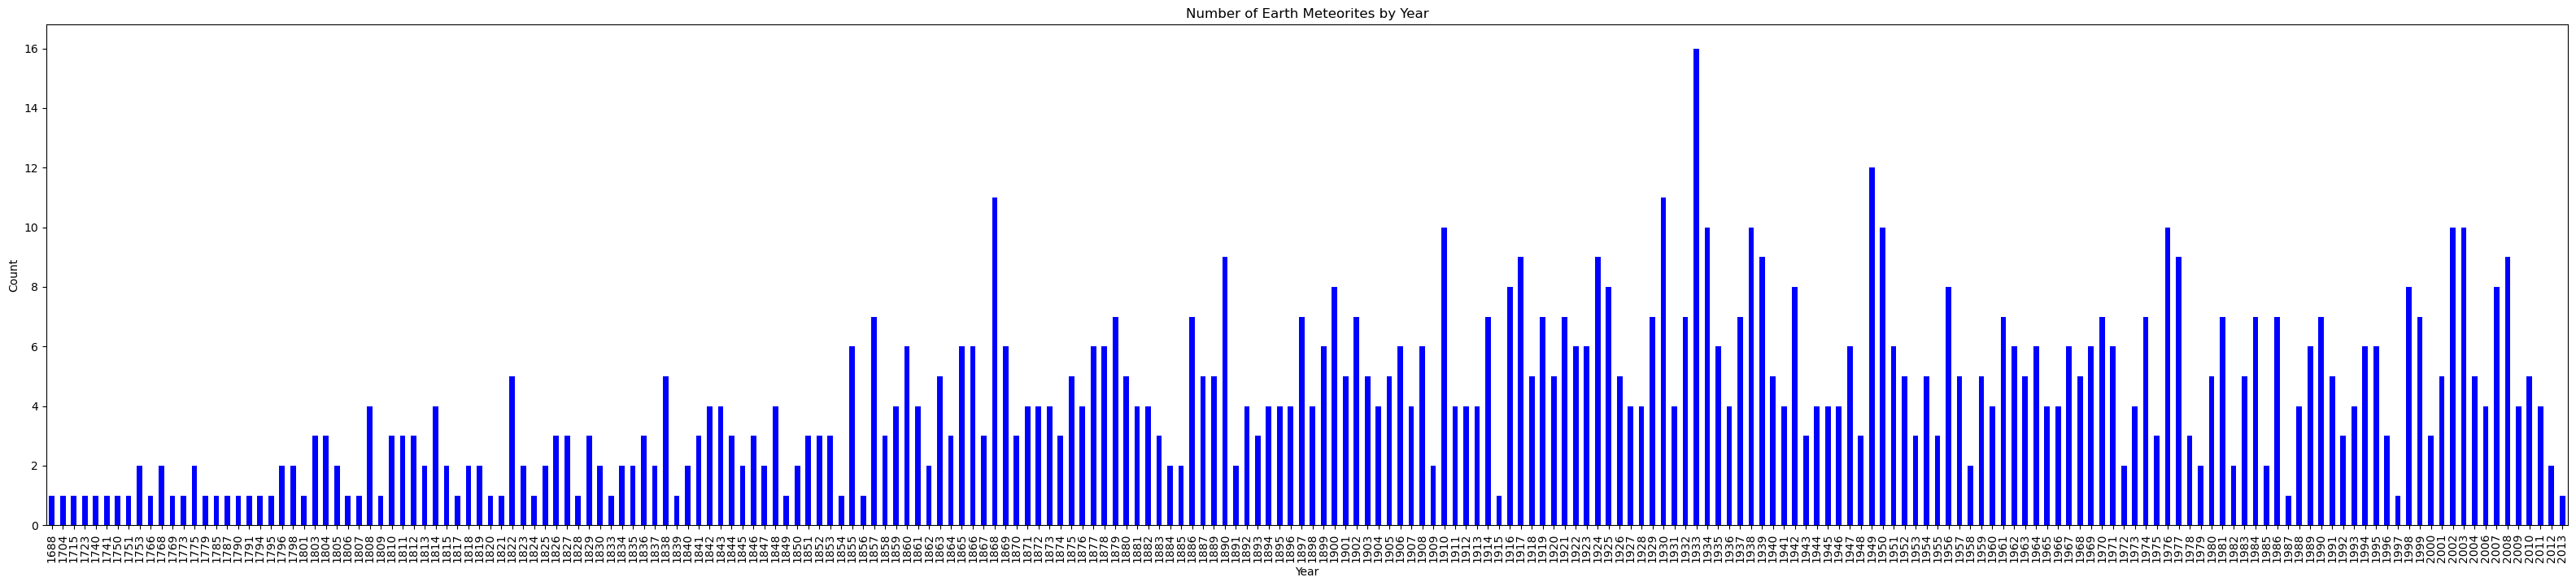

In [10]:
# Plot : Number of Earth Meteorites by Year

plt.figure(figsize=(40, 8))
yearly.plot(kind='bar', color='blue')
plt.title('Number of Earth Meteorites by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [11]:
before_2000 = df[df["year"].dt.year < 2000]

before_2000

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


Conclusion:

Out of 1000 Meterites, 912  before 2000.

# Get all the earth meteorites co-ordinates who fell before the year 1970

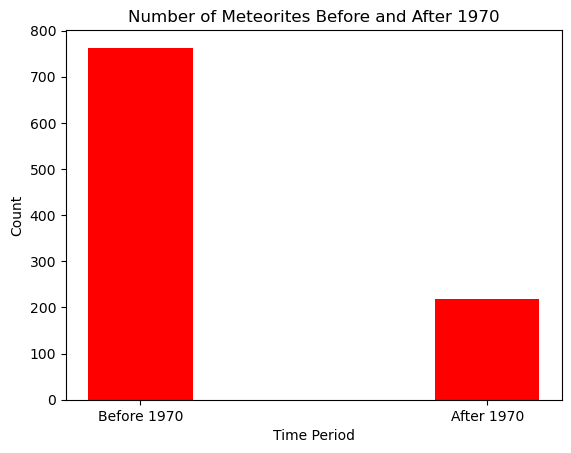

In [12]:
# Filter the DataFrame for meteorites before and after 1970
meteorites_before_1970 = df[df['year'].dt.year < 1970]
meteorites_after_1970 = df[df['year'].dt.year >= 1970]

# Get the counts for meteorites before and after 1970
count_before_1970 = len(meteorites_before_1970)
count_after_1970 = len(meteorites_after_1970)

# Create a bar plot to compare the counts
categories = ['Before 1970', 'After 1970']
counts = [count_before_1970, count_after_1970]

plt.bar(categories, counts, width = 0.3, color = 'red')
plt.title('Number of Meteorites Before and After 1970')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.show()

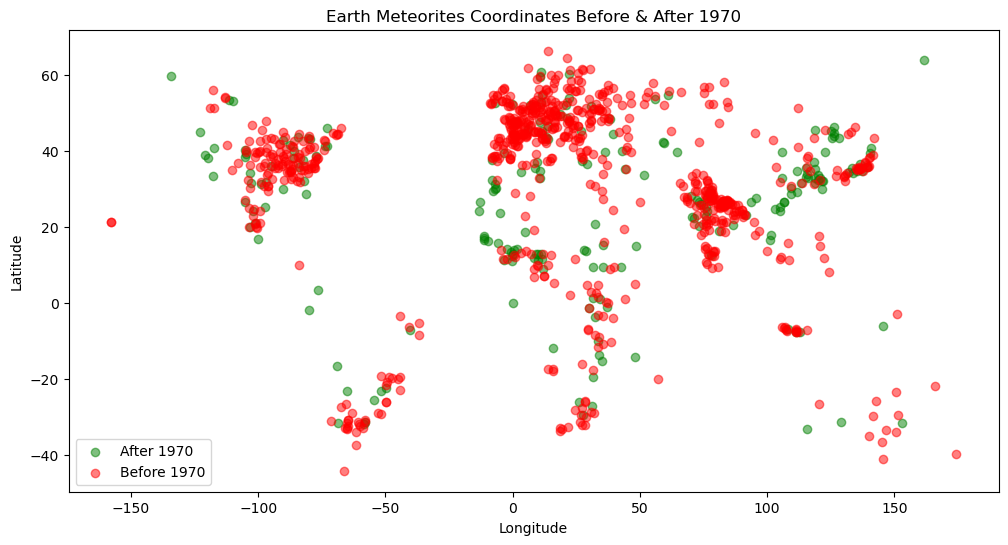

In [13]:
# Plot: Earth meteorites coordinates before 1970
plt.figure(figsize=(12, 6))
plt.scatter(meteorites_after_1970['reclong'],
            meteorites_after_1970['reclat'],
            label = 'After 1970', 
            color='green', alpha=0.5)
plt.scatter(meteorites_before_1970['reclong'],
            meteorites_before_1970['reclat'], 
            label = 'Before 1970',
            color='red', alpha=0.5)
plt.title('Earth Meteorites Coordinates Before & After 1970')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [14]:
# Final dataframe as the answer to the question

meteorites_before_1970[["year", "reclong", "reclat"]]

,year,reclong,reclat
0,1880-01-01,6.08333,50.77500
1,1951-01-01,10.23333,56.18333
2,1952-01-01,-113.00000,54.21667
4,1902-01-01,-64.95000,-33.16667
5,1919-01-01,71.80000,32.10000
...,...,...,...
994,1807-01-01,35.20000,54.50000
995,1934-01-01,79.41667,13.63333
997,1869-01-01,111.53333,-7.08333
998,1922-01-01,106.58333,-6.66667


Total 763 Meteorites fell before the year 1970.

# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

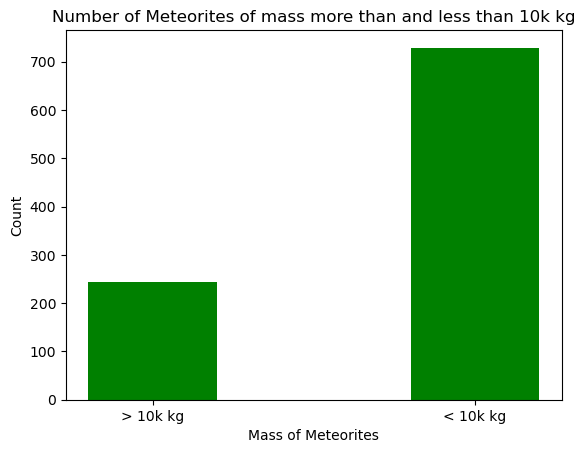

In [15]:
# DataFrame containing Meteorites of mass more than 10000 kg
more_than_10k_kg = df[df.mass > 10000]
less_than_10k_kg = df[df.mass <= 10000]

# Get the counts for meteorites of mass more than & less than 10k kg
more_than_10k_kg_count = len(more_than_10k_kg)
less_than_10k_kg_count = len(less_than_10k_kg)

# Create a bar plot to compare the counts
categories = ['> 10k kg', '< 10k kg']
counts = [more_than_10k_kg_count, less_than_10k_kg_count]

plt.bar(categories, counts, width= 0.4, color='green')
plt.title('Number of Meteorites of mass more than and less than 10k kg')
plt.xlabel('Mass of Meteorites')
plt.ylabel('Count')
plt.show()

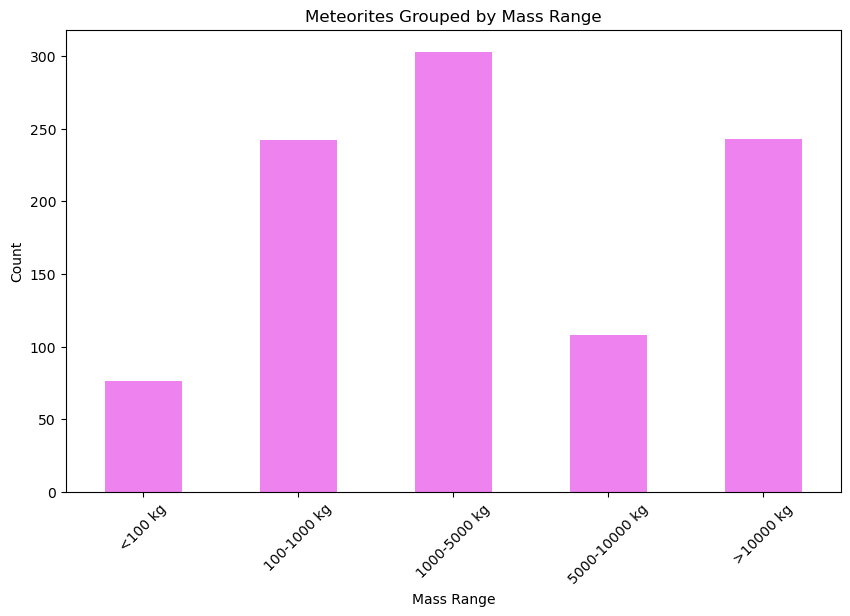

In [16]:
# Define the mass ranges and corresponding labels
mass_ranges = [0, 100, 1000, 5000, 10000, float('inf')]
labels = ['<100 kg', '100-1000 kg', '1000-5000 kg', '5000-10000 kg', '>10000 kg']

# Group the meteorites based on the mass ranges and calculate the count for each range
grouped = df.groupby(pd.cut(df['mass'], bins=mass_ranges, labels=labels)).size()

# Create a bar plot to visualize the grouped data
grouped.plot(kind='bar', figsize=(10, 6), color='violet',)
plt.title('Meteorites Grouped by Mass Range')
plt.xlabel('Mass Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
more_than_10k_kg

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong,coordinates
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667,"[0.61667, 44.21667]"
11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333,"[8.38333, 19.08333]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667,"[42.81667, 39.91667]"
27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000,"[10.15, 45.26667]"
...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878-01-01,49.60000,17.11667,"[17.11667, 49.6]"
992,Tilden,23998,Valid,L6,74800.0,1927-01-01,38.20000,-89.68333,"[-89.68333, 38.2]"
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"


Observations: 
  
  
  Total 243 Meteorites have mass more than 10k kg.